# Parâmetros:
O código está usando o exemplo dos slides sobre a aplicação do algoritmo genético com um pouco de toque pessoal
## Tamanho da População: Aleatoriamente entre 100 e 500 usando random.randint(100, 500).
## Taxa de Crossover: Aleatoriamente entre 60%, 80% e 100% usando random.choice([0.6, 0.8, 1.0]).
## Taxa de Mutação: Aleatoriamente entre 0,001 e 0,010 usando random.choice([0.001, 0.010]).
## Elitismo True ou Fase.

Os resultados de cada execução são armazenados em uma lista results, incluindo os parâmetros utilizados e o desempenho obtido.

No fim do algoritmo ele printa as 5 melhores execuções e as configurações utilizadas.

In [36]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
import pandas as pd

In [37]:
def four_peaks_fitness(bitstring, T, R):
    N = len(bitstring)
    max_ones = max_zeros = 0

    # Contagem de 1's consecutivos no início
    for bit in bitstring:
        if bit == 1:
            max_ones += 1
        else:
            break

    # Contagem de 0's consecutivos no final
    for bit in reversed(bitstring):
        if bit == 0:
            max_zeros += 1
        else:
            break

    # Cálculo do fitness com bônus
    if max_ones > T and max_zeros > T:
        return max_ones + max_zeros + R
    else:
        return max_ones + max_zeros

def genetic_algorithm(N=100, T=20, R=10, population_size=100, mutation_rate=0.01, crossover_rate=0.8, generations=100, elitism=False):
    # Inicialização da população
    population = [[random.randint(0, 1) for _ in range(N)] for _ in range(population_size)]
    best_fitness_history = []
    average_fitness_history = []

    for generation in range(generations):
        # Avaliação da população
        fitness_values = [four_peaks_fitness(individual, T, R) for individual in population]
        best_fitness = max(fitness_values)
        average_fitness = sum(fitness_values) / population_size

        best_fitness_history.append(best_fitness)
        average_fitness_history.append(average_fitness)

        new_population = []

        # Elitismo: mantém o melhor indivíduo
        if elitism:
            best_individual = population[fitness_values.index(best_fitness)]
            new_population.append(best_individual)

        # Seleção por torneio
        selected = []
        for _ in range(population_size):
            i, j = random.sample(range(population_size), 2)
            if fitness_values[i] > fitness_values[j]:
                selected.append(population[i])
            else:
                selected.append(population[j])

        # Crossover e mutação
        for i in range(0, population_size - (1 if elitism else 0), 2):
            parent1 = selected[i]
            parent2 = selected[i+1] if i+1 < population_size else selected[0]

            # Crossover
            if random.random() < crossover_rate:
                point = random.randint(1, N-1)
                offspring1 = parent1[:point] + parent2[point:]
                offspring2 = parent2[:point] + parent1[point:]
            else:
                offspring1 = parent1[:]
                offspring2 = parent2[:]

            # Mutação
            for offspring in [offspring1, offspring2]:
                for idx in range(N):
                    if random.random() < mutation_rate:
                        offspring[idx] = 1 - offspring[idx]

                new_population.append(offspring)

            # Garante que a população mantém o tamanho correto
            if len(new_population) >= population_size:
                break

        population = new_population[:population_size]

    # Obtenção do melhor indivíduo final
    fitness_values = [four_peaks_fitness(individual, T, R) for individual in population]
    best_fitness = max(fitness_values)
    best_individual = population[fitness_values.index(best_fitness)]

    return best_individual, best_fitness, best_fitness_history, average_fitness_history


Top 5 Execuções e Seus Parâmetros:

Execução 1:
Melhor Fitness: 99
Tamanho da População: 485
Taxa de Crossover: 100%
Taxa de Mutação: 0.01
Elitismo: Ativado

Execução 2:
Melhor Fitness: 96
Tamanho da População: 498
Taxa de Crossover: 80%
Taxa de Mutação: 0.01
Elitismo: Ativado

Execução 3:
Melhor Fitness: 93
Tamanho da População: 420
Taxa de Crossover: 80%
Taxa de Mutação: 0.01
Elitismo: Ativado

Execução 4:
Melhor Fitness: 92
Tamanho da População: 328
Taxa de Crossover: 100%
Taxa de Mutação: 0.001
Elitismo: Ativado

Execução 5:
Melhor Fitness: 92
Tamanho da População: 407
Taxa de Crossover: 100%
Taxa de Mutação: 0.01
Elitismo: Ativado


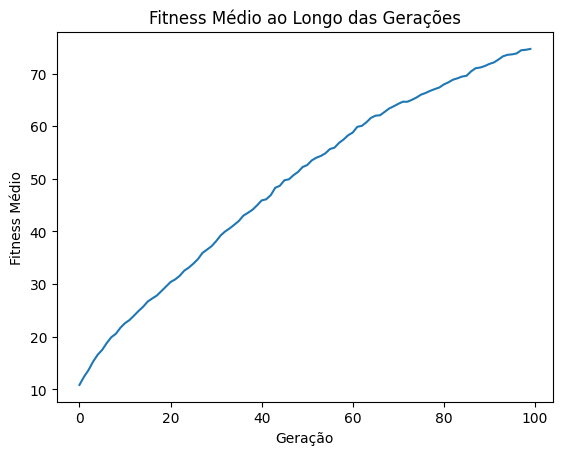

In [38]:
# Definição dos parâmetros fixos
num_runs = 60  # Número de execuções
N = 100  # Tamanho da string binária
T = 20
R = 10
generations = 100 # Número de gerações

results = []

for run in range(num_runs):
    # Escolha aleatória dos parâmetros
    population_size = random.randint(100, 500)
    crossover_rate = random.choice([0.6, 0.8, 1.0])
    mutation_rate = random.choice([0.001, 0.010])
    elitism = random.choice([True, False])

    # Execução do algoritmo genético
    best_individual, best_fitness, best_fitness_history, average_fitness_history = genetic_algorithm(
        N=N,
        T=T,
        R=R,
        population_size=population_size,
        mutation_rate=mutation_rate,
        crossover_rate=crossover_rate,
        generations=generations,
        elitism=elitism
    )

    # Armazenamento dos resultados
    results.append({
        'best_individual': best_individual,
        'best_fitness': best_fitness,
        'best_fitness_history': best_fitness_history,
        'average_fitness_history': average_fitness_history,
        'population_size': population_size,
        'crossover_rate': crossover_rate,
        'mutation_rate': mutation_rate,
        'elitism': elitism
    })

# Após todas as execuções, podemos analisar os resultados

# Ordenação dos resultados pelo melhor fitness obtido
results_sorted = sorted(results, key=lambda x: x['best_fitness'], reverse=True)

# Impressão dos parâmetros e desempenho das 5 melhores execuções
print("Top 5 Execuções e Seus Parâmetros:")
for i in range(5):
    result = results_sorted[i]
    print(f"\nExecução {i+1}:")
    print(f"Melhor Fitness: {result['best_fitness']}")
    print(f"Tamanho da População: {result['population_size']}")
    print(f"Taxa de Crossover: {int(result['crossover_rate'] * 100)}%")
    print(f"Taxa de Mutação: {result['mutation_rate']}")
    print(f"Elitismo: {'Ativado' if result['elitism'] else 'Desativado'}")

# Gráfico do desempenho das soluções

# Cálculo do fitness médio ao longo das gerações
average_best_fitness_over_runs = [0] * generations
for gen in range(generations):
    sum_best_fitness = 0
    for result in results:
        sum_best_fitness += result['best_fitness_history'][gen]
    average_best_fitness_over_runs[gen] = sum_best_fitness / num_runs

# Plotagem do fitness médio ao longo das gerações
plt.plot(average_best_fitness_over_runs)
plt.title('Fitness Médio ao Longo das Gerações')
plt.xlabel('Geração')
plt.ylabel('Fitness Médio')
plt.show()



In [39]:
# Extracting data from results
population_sizes = [result['population_size'] for result in results]
best_fitnesses = [result['best_fitness'] for result in results]
crossover_rates = [result['crossover_rate'] for result in results]
mutation_rates = [result['mutation_rate'] for result in results]
elitism_values = [result['elitism'] for result in results]

# Creating a DataFrame with the results
data = {
    'Tamanho da População': population_sizes,
    'Melhor Fitness': best_fitnesses,
    'Taxa de Crossover': crossover_rates,
    'Taxa de Mutação': mutation_rates,
    'Elitismo': elitism_values
}
df = pd.DataFrame(data)
df['Elitismo'] = df['Elitismo'].map({True: 'Ativado', False: 'Desativado'})


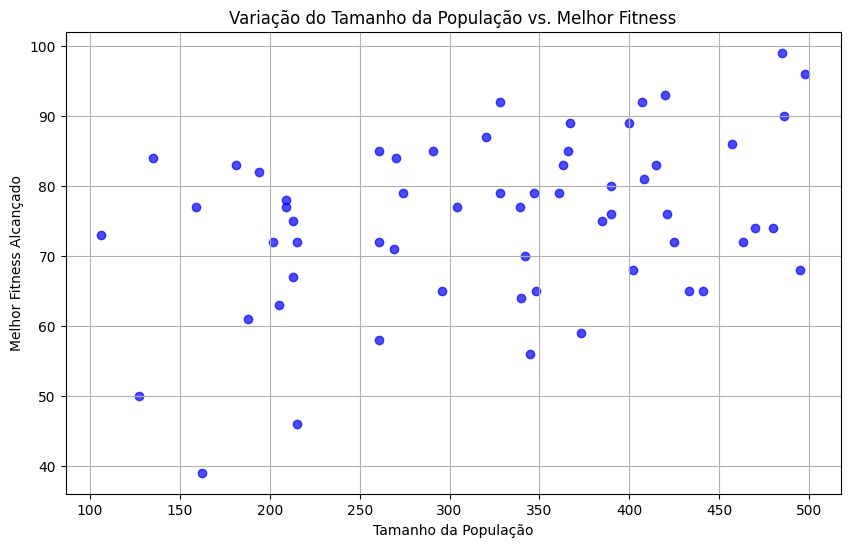

In [40]:
# Extraindo os tamanhos de população e os melhores fitness de cada execução
population_sizes = [result['population_size'] for result in results]
best_fitnesses = [result['best_fitness'] for result in results]

# Criando um gráfico de dispersão (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(population_sizes, best_fitnesses, alpha=0.7, color='blue')
plt.title('Variação do Tamanho da População vs. Melhor Fitness')
plt.xlabel('Tamanho da População')
plt.ylabel('Melhor Fitness Alcançado')
plt.grid(True)
plt.show()

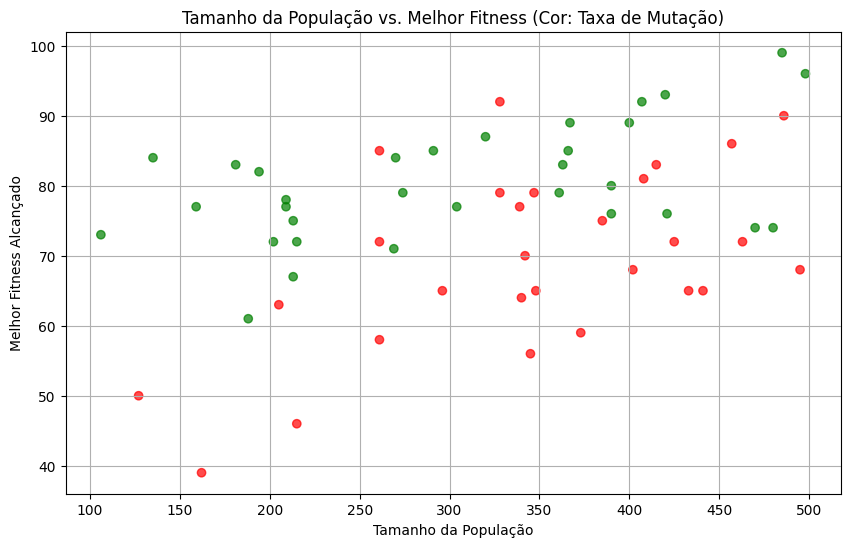

In [41]:
# Criando um mapa de cores para a taxa de mutação
mutation_rates = [result['mutation_rate'] for result in results]
colors = ['red' if rate == 0.001 else 'green' for rate in mutation_rates]

# Criando o scatter plot com cores
plt.figure(figsize=(10, 6))
plt.scatter(population_sizes, best_fitnesses, c=colors, alpha=0.7)
plt.title('Tamanho da População vs. Melhor Fitness (Cor: Taxa de Mutação)')
plt.xlabel('Tamanho da População')
plt.ylabel('Melhor Fitness Alcançado')
plt.grid(True)
plt.show()


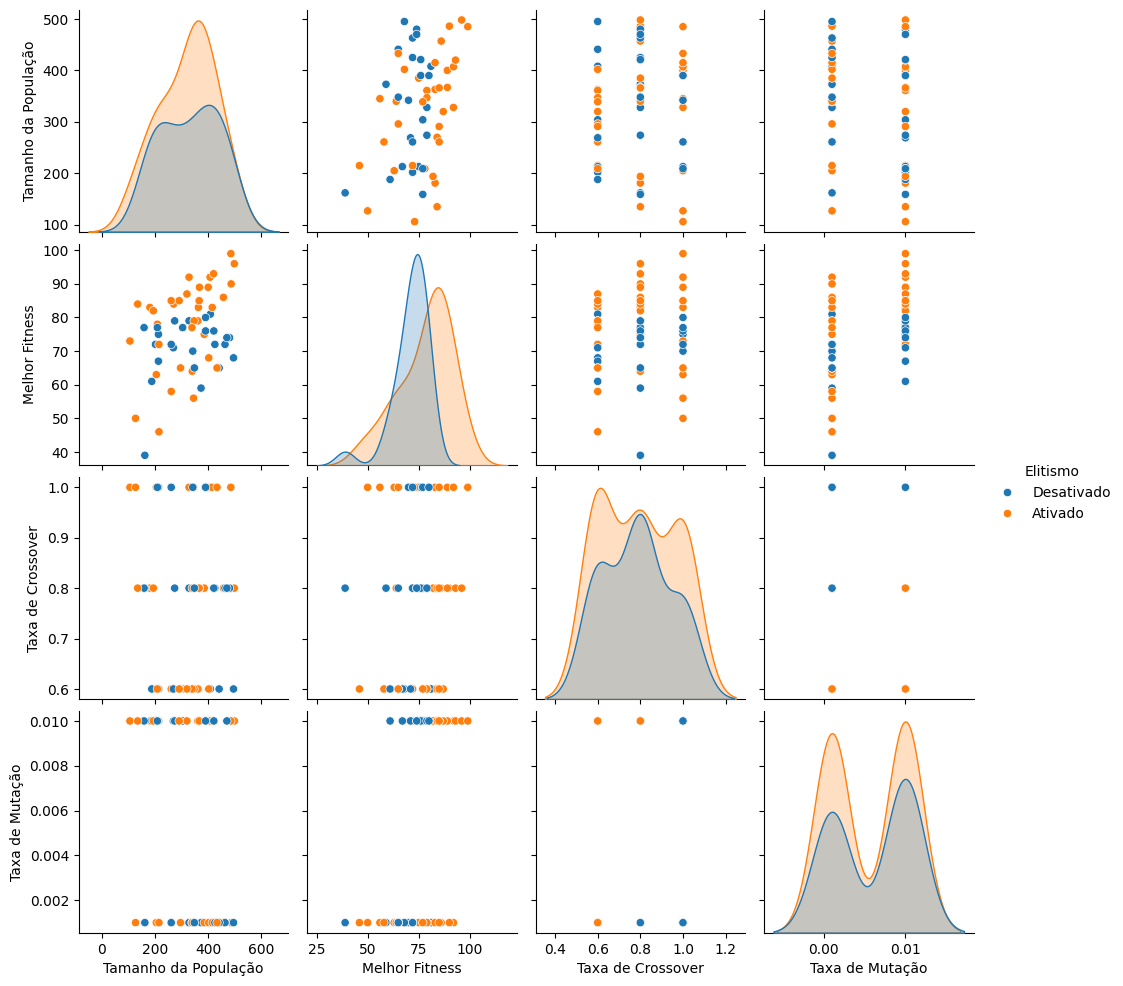

In [42]:
# Criando um DataFrame com os resultados
data = {
    'Tamanho da População': population_sizes,
    'Melhor Fitness': best_fitnesses,
    'Taxa de Crossover': [result['crossover_rate'] for result in results],
    'Taxa de Mutação': mutation_rates,
    'Elitismo': elitism_values
}
df = pd.DataFrame(data)
df['Elitismo'] = df['Elitismo'].map({True: 'Ativado', False: 'Desativado'})

# Criando o pair plot
sns.pairplot(df, hue='Elitismo', diag_kind='kde')
plt.show()


In [43]:
import plotly.express as px

# Ensure 'df' is defined before this point

fig = px.scatter(
    df,
    x='Tamanho da População',
    y='Melhor Fitness',
    color='Elitismo',
    size='Taxa de Crossover',
    hover_data=['Taxa de Mutação']
)
fig.show()


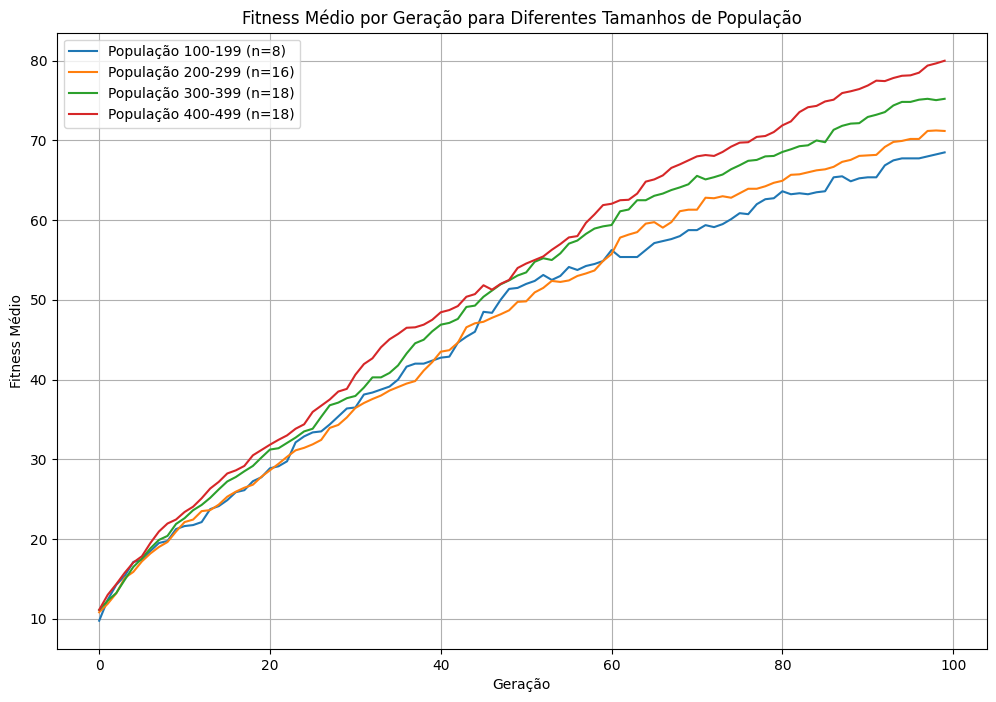

In [44]:
# Dividindo as execuções em grupos baseados no tamanho da população
# Vamos criar faixas de tamanho de população para agrupar os dados
bins = [100, 200, 300, 400, 500, 600]
labels = ['100-199', '200-299', '300-399', '400-499', '500-600']
results_by_pop_size = {label: [] for label in labels}

for result in results:
    pop_size = result['population_size']
    # Encontrando a faixa correspondente
    for i in range(len(bins)-1):
        if bins[i] <= pop_size < bins[i+1]:
            results_by_pop_size[labels[i]].append(result)
            break

# Plotando o fitness médio por geração para cada faixa de tamanho de população
plt.figure(figsize=(12, 8))

for label, group in results_by_pop_size.items():
    if group:  # Verifica se o grupo não está vazio
        num_generations = len(group[0]['best_fitness_history'])
        avg_best_fitness = np.zeros(num_generations)
        for result in group:
            avg_best_fitness += np.array(result['best_fitness_history'])
        avg_best_fitness /= len(group)
        plt.plot(avg_best_fitness, label=f'População {label} (n={len(group)})')

plt.title('Fitness Médio por Geração para Diferentes Tamanhos de População')
plt.xlabel('Geração')
plt.ylabel('Fitness Médio')
plt.legend()
plt.grid(True)
plt.show()


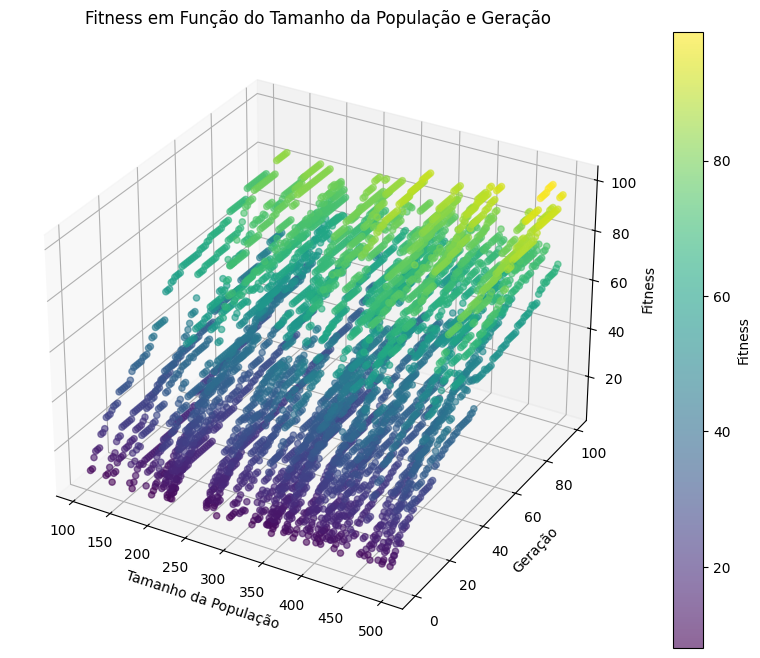

In [45]:
# Preparando os dados
pop_sizes = []
generations = []
fitnesses = []

for result in results:
    pop_size = result['population_size']
    for gen_idx, fitness in enumerate(result['best_fitness_history']):
        pop_sizes.append(pop_size)
        generations.append(gen_idx)
        fitnesses.append(fitness)

# Criando o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pop_sizes, generations, fitnesses, c=fitnesses, cmap='viridis', alpha=0.6)

ax.set_title('Fitness em Função do Tamanho da População e Geração')
ax.set_xlabel('Tamanho da População')
ax.set_ylabel('Geração')
ax.set_zlabel('Fitness')

fig.colorbar(scatter, ax=ax, label='Fitness')
plt.show()


Nas cinco melhores execuções, observei o seguinte:

Populações altas deram bons resultados, de populacão com mais de 320 indivíduos, chegando até 485 na melhor execução, quanto maior a população aumenta a diversidade genética, permitindo que o algoritmo explore melhor o espaço de soluções e evite ficar preso em ótimos locais.

Taxa de Crossover Alta: As melhores execuções usaram taxas de crossover de 80% ou 100%, favorecendo a recombinação de características vantajosas.

Taxa de Mutação Moderada: A maioria utilizou uma taxa de mutação de 1% (0.01). Essa taxa moderada parece oferecer um bom equilíbrio entre exploração e explotação, introduzindo diversidade suficiente para escapar de ótimos locais sem desestabilizar a população.

Elitismo Ativado: Em todas as cinco melhores execuções, o elitismo estava ativado. Isso faz sentido, e foi destacado no pdf auxiliar.

O melhor fitness alcançado foi 99, o que está bem próximo do valor máximo teórico possível para este problema. Isso indica que, com as configurações certas, o GA é eficaz em encontrar soluções próximas do ótimo global no problema dos 4 picos.

In [46]:
def hill_climbing(N=100, T=20, R=10, max_iterations=1000):
    # Inicialização aleatória
    current_solution = [random.randint(0, 1) for _ in range(N)]
    current_fitness = four_peaks_fitness(current_solution, T, R)
    fitness_history = [current_fitness]
    
    for iteration in range(max_iterations):
        neighbors = []
        # Geração de vizinhos invertendo um bit de cada vez
        for i in range(N):
            neighbor = current_solution.copy()
            neighbor[i] = 1 - neighbor[i]  # Inverte o bit
            neighbors.append(neighbor)
        
        # Avaliação dos vizinhos
        neighbor_fitness = [four_peaks_fitness(neighbor, T, R) for neighbor in neighbors]
        best_neighbor_index = neighbor_fitness.index(max(neighbor_fitness))
        best_neighbor = neighbors[best_neighbor_index]
        best_neighbor_fitness = neighbor_fitness[best_neighbor_index]
        
        # Verificação de melhoria
        if best_neighbor_fitness > current_fitness:
            current_solution = best_neighbor
            current_fitness = best_neighbor_fitness
            fitness_history.append(current_fitness)
        else:
            # Se nenhum vizinho é melhor, termina a busca
            break
    
    return current_solution, current_fitness, fitness_history


In [47]:
num_runs_hc = 100  # Número de execuções
N = 100  # Tamanho da string binária
T = 20
R = 10
max_iterations = 1000

results_hc = []

for run in range(num_runs_hc):
    best_solution, best_fitness, fitness_history = hill_climbing(
        N=N,
        T=T,
        R=R,
        max_iterations=max_iterations
    )
    results_hc.append({
        'best_solution': best_solution,
        'best_fitness': best_fitness,
        'fitness_history': fitness_history
    })

# Ordenação dos resultados pelo melhor fitness obtido
results_hc_sorted = sorted(results_hc, key=lambda x: x['best_fitness'], reverse=True)

# Impressão dos parâmetros e desempenho das 5 melhores execuções
print("Top 5 Execuções do Hill Climbing e Seus Resultados:")
for i in range(5):
    result = results_hc_sorted[i]
    print(f"\nExecução {i+1}:")
    print(f"Melhor Fitness: {result['best_fitness']}")
    print(f"Número de Iterações: {len(result['fitness_history'])}")


Top 5 Execuções do Hill Climbing e Seus Resultados:

Execução 1:
Melhor Fitness: 110
Número de Iterações: 42

Execução 2:
Melhor Fitness: 110
Número de Iterações: 48

Execução 3:
Melhor Fitness: 100
Número de Iterações: 41

Execução 4:
Melhor Fitness: 100
Número de Iterações: 45

Execução 5:
Melhor Fitness: 100
Número de Iterações: 45


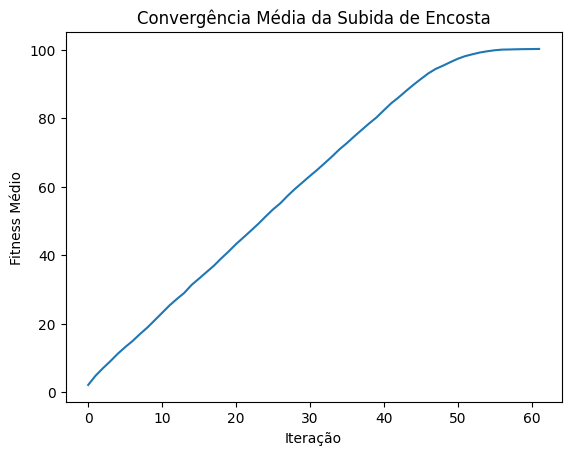

In [48]:
# Cálculo da média das curvas de convergência
max_length_hc = max(len(result['fitness_history']) for result in results_hc)
average_fitness_history_hc = []

for i in range(max_length_hc):
    fitness_values_at_i = []
    for result in results_hc:
        if i < len(result['fitness_history']):
            fitness_values_at_i.append(result['fitness_history'][i])
        else:
            fitness_values_at_i.append(result['fitness_history'][-1])  # Usa o último valor se a execução terminou antes
    average_fitness_history_hc.append(sum(fitness_values_at_i) / num_runs_hc)

# Gráfico de convergência média
plt.plot(average_fitness_history_hc)
plt.title('Convergência Média da Subida de Encosta')
plt.xlabel('Iteração')
plt.ylabel('Fitness Médio')
plt.show()


In [49]:
# Coletando os melhores fitness de cada execução
final_fitness_values_hc = [result['best_fitness'] for result in results_hc]

# Cálculo de métricas estatísticas
media_fitness_final_hc = sum(final_fitness_values_hc) / num_runs_hc
variancia_fitness_final_hc = sum((x - media_fitness_final_hc) ** 2 for x in final_fitness_values_hc) / num_runs_hc

print(f"Média do Fitness Final (Hill Climbing): {media_fitness_final_hc}")
print(f"Variância do Fitness Final (Hill Climbing): {variancia_fitness_final_hc}")


Média do Fitness Final (Hill Climbing): 100.2
Variância do Fitness Final (Hill Climbing): 1.9599999999999982


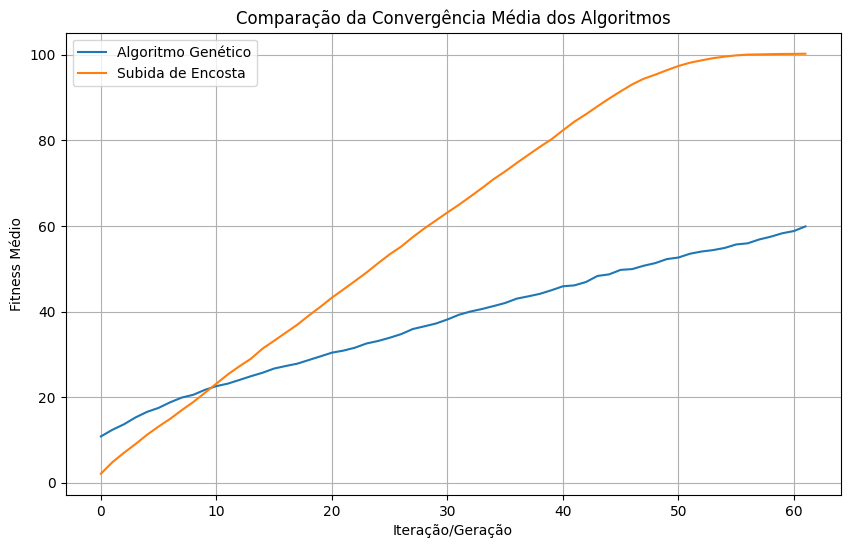

In [50]:
# Já temos average_best_fitness_over_runs do Algoritmo Genético
# E average_fitness_history_hc do Hill Climbing

# Ajustando o comprimento das listas para serem iguais
min_length = min(len(average_best_fitness_over_runs), len(average_fitness_history_hc))
average_best_fitness_over_runs_adj = average_best_fitness_over_runs[:min_length]
average_fitness_history_hc_adj = average_fitness_history_hc[:min_length]

# Plotando os gráficos
plt.figure(figsize=(10, 6))
plt.plot(average_best_fitness_over_runs_adj, label='Algoritmo Genético')
plt.plot(average_fitness_history_hc_adj, label='Subida de Encosta')
plt.title('Comparação da Convergência Média dos Algoritmos')
plt.xlabel('Iteração/Geração')
plt.ylabel('Fitness Médio')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
final_fitness_values = [result['best_fitness'] for result in results]

media_fitness_final = sum(final_fitness_values) / num_runs
variancia_fitness_final = sum((x - media_fitness_final) ** 2 for x in final_fitness_values) / num_runs


In [53]:
# Já temos media_fitness_final e variancia_fitness_final do Algoritmo Genético
# E media_fitness_final_hc e variancia_fitness_final_hc do Hill Climbing

print("\nComparação das Métricas Estatísticas:")
print(f"Média do Fitness Final (Algoritmo Genético): {media_fitness_final}")
print(f"Variância do Fitness Final (Algoritmo Genético): {variancia_fitness_final}")

print(f"Média do Fitness Final (Hill Climbing): {media_fitness_final_hc}")
print(f"Variância do Fitness Final (Hill Climbing): {variancia_fitness_final_hc}")



Comparação das Métricas Estatísticas:
Média do Fitness Final (Algoritmo Genético): 75.21666666666667
Variância do Fitness Final (Algoritmo Genético): 140.60305555555558
Média do Fitness Final (Hill Climbing): 100.2
Variância do Fitness Final (Hill Climbing): 1.9599999999999982


# Média do Fitness Final

## Algoritmo Genético: Aproximadamente 75.22
## Hill Climbing: 100.2

# Variância do Fitness Final

## Algoritmo Genético: Aproximadamente 140.60
## Hill Climbing: Aproximadamente 1.96